<a href="https://colab.research.google.com/github/Aarav77/montypythonclassworkandhomework/blob/main/titanicdecisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
datatoload=files.upload()

Saving titanic.csv to titanic.csv


In [2]:
import pandas as pd
columnames=['PassengerId','Pclass','Sex','Age','SibSp','Parch', 'survived']
df=pd.read_csv("titanic.csv", names=columnames).iloc[1:]
print(df.head())

  PassengerId Pclass Sex   Age SibSp Parch survived
1           1      3   1  34.5     1     0        0
2           2      1   0    47     1     0        1
3           3      3   0    62     0     0        1
4           4      1   0    27     1     0        1
5           5      3   1    22     0     0        0


In [4]:
features=['PassengerId','Pclass','Sex','Age','SibSp','Parch']
x=df[features]
y=df.survived
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
xtrain,xtest, ytrain, ytest=train_test_split(x, y, test_size=0.3, random_state=1)
clf=DecisionTreeClassifier()
clf=clf.fit(xtrain, ytrain)
ypred=clf.predict(xtest)
print("accuracy:c ", metrics.accuracy_score(ytest, ypred))

accuracy:c  0.6902985074626866


In [5]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dotdata=StringIO()
export_graphviz(clf, out_file=dotdata, filled=True, rounded=True, special_characters=True, feature_names=features, class_names=['0', '1'])
print(dotdata.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<Sex &le; 0.5<br/>gini = 0.463<br/>samples = 623<br/>value = [396, 227]<br/>class = 0>, fillcolor="#f4c9aa"] ;
1 [label=<Pclass &le; 2.5<br/>gini = 0.387<br/>samples = 217<br/>value = [57, 160]<br/>class = 1>, fillcolor="#80c0ee"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<Age &le; 0.5<br/>gini = 0.097<br/>samples = 117<br/>value = [6, 111]<br/>class = 1>, fillcolor="#44a2e6"] ;
1 -> 2 ;
3 [label=<PassengerId &le; 176.0<br/>gini = 0.391<br/>samples = 15<br/>value = [4, 11]<br/>class = 1>, fillcolor="#81c1ee"] ;
2 -> 3 ;
4 [label=<gini = 0.0<br/>samples = 4<br/>value = [0, 4]<br/>class = 1>, fillcolor="#399de5"] ;
3 -> 4 ;
5 [label=<PassengerId &le; 362.5<br/>gini = 0.463<br/>samples = 11<br/>value = [4, 7]<br/>class = 1>, fillcolor="#aad5f4"] ;
3 -> 5 ;
6 [label=<PassengerId &le; 294.5<br/>gini = 0.49<br/>samples = 7<br/>value

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


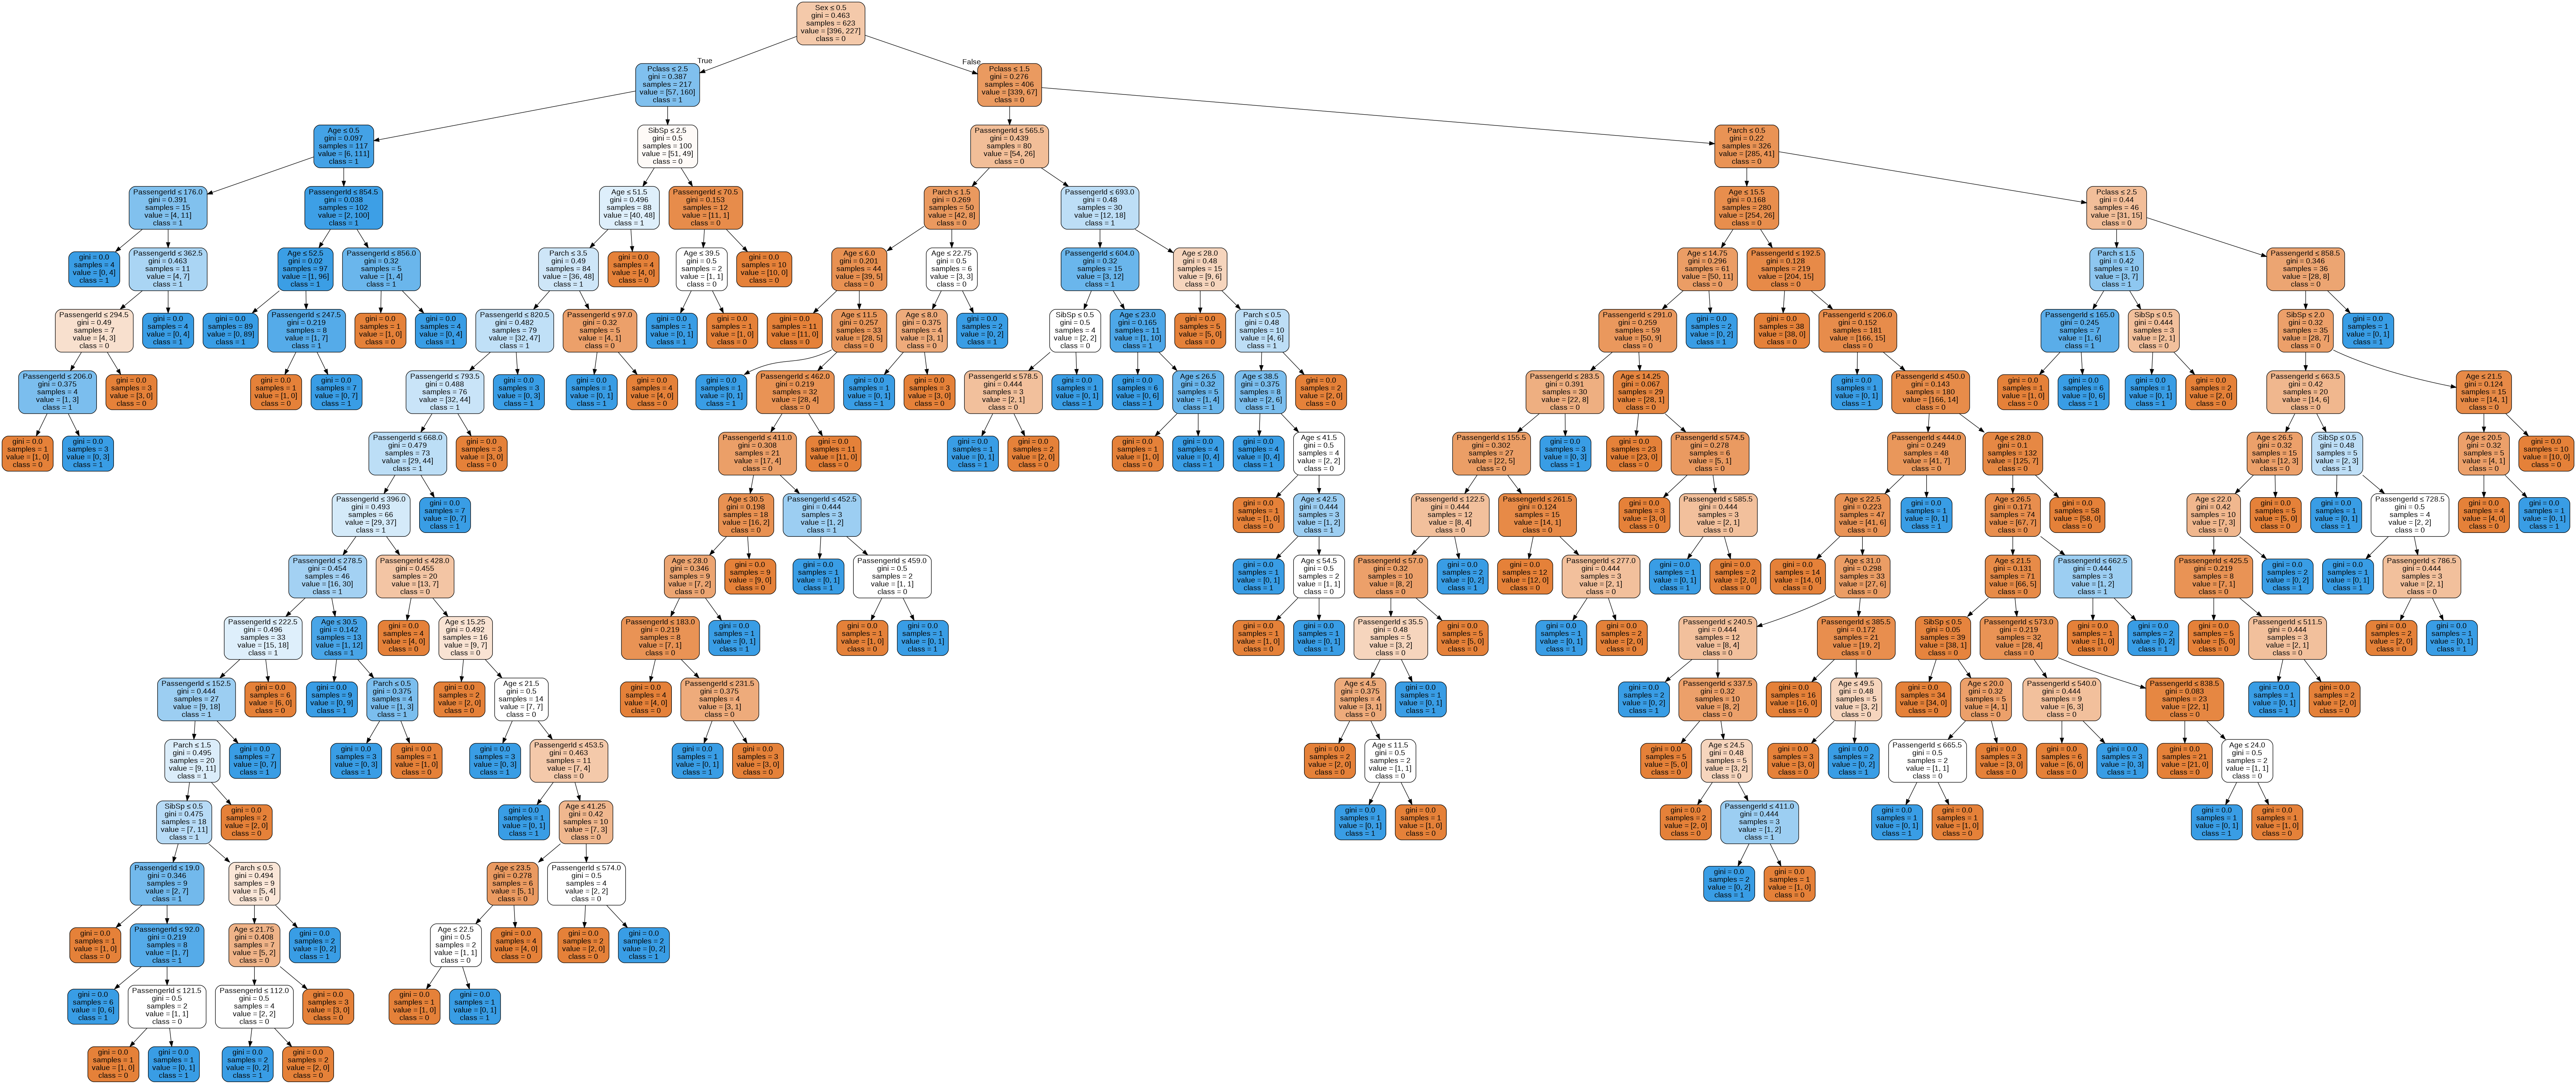

In [6]:
graph=pydotplus.graph_from_dot_data(dotdata.getvalue())
graph.write_png('titanic.png')
Image(graph.create_png())

In [7]:
clf=DecisionTreeClassifier(max_depth=3)
clf=clf.fit(xtrain, ytrain)
ypred=clf.predict(xtest)
print("accuracy:c ", metrics.accuracy_score(ytest, ypred))

accuracy:c  0.746268656716418


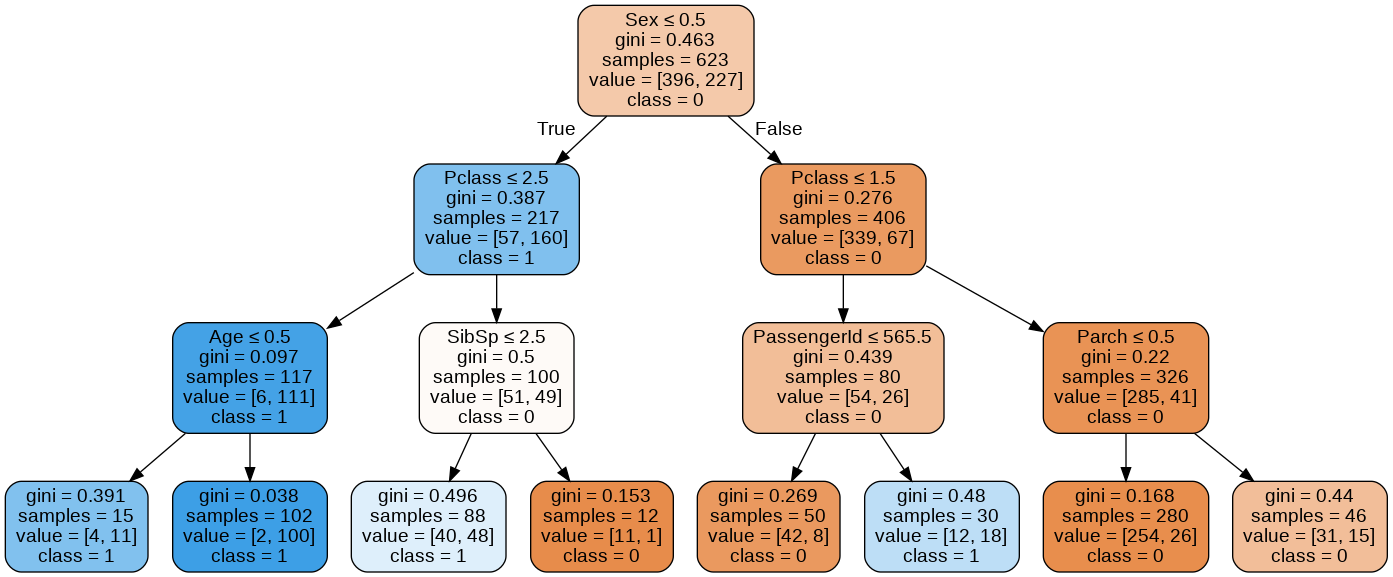

In [8]:
dotdata=StringIO()
export_graphviz(clf, out_file=dotdata, filled=True, rounded=True, special_characters=True, feature_names=features, class_names=['0', '1'])
graph=pydotplus.graph_from_dot_data(dotdata.getvalue())
graph.write_png('titanic.png')
Image(graph.create_png())